# Project 3 -- Rotation Curves
UGC 11876
Using the KAST optical spectrograph on the Shane 3-meter. 

First step: Open up the fits files and headers! 

In [92]:
# import functions
from astropy.io import fits

import matplotlib.pyplot as plt

import numpy as np

from specutils import Spectrum1D

In [93]:
def open_data(file): 
    '''
    Opens all of the fits files and saves the data into a variable. 
    '''
    
    data_hdu = fits.open(file)
    data = data_hdu[0].data.astype('float')
    
    return data 

In [94]:
def open_hdr(file): 
    '''
    Opens all of the fits files and saves the data into a variable. 
    '''
    
    data_hdu = fits.open(file)
    hdr = data_hdu[0].header
    
    return hdr 

In [95]:
def plot_image(data, p_min, p_max, title, c_label): 
    
    '''
    Plots the given data. Using the scaling limits provided. 
    '''
    # plot the median of the darks
    plt.figure(figsize = (10,10))

    # actual image and axes
    ax = plt.gca()
    
    # minimum and maximum for image scaling 
    vmin = np.percentile(data, p_min)
    vmax = np.percentile(data, p_max)
    
    im = plt.imshow(data, vmin = vmin, vmax = vmax) 
    
    # set title 
    plt.title(f'{title}')

    # color bar
    #div = make_axes_locatable(ax) 
    #cbax = div.append_axes('right', size = '5%', pad = 0.1)
    #cb = plt.colorbar(im, cax = cbax, label = f'{c_label}')


    plt.tight_layout()

In [90]:
def plot_spectrum(data, title, x_label, y_label): 
    
    '''
    Plots the given data. 
    '''
    # plot the median of the darks
    plt.figure(figsize = (20,10))
    
    im = plt.plot(data, lw = 1) 
    
    # set title 
    plt.title(f'{title}')
    
    # set axis titles
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')

    plt.tight_layout()


In [96]:
def stack_spectrum(data): 
    '''
    Sums up the spectrum counts in each column. 
    
    Returns: 1D array of stacked spectrum. 
    '''

In [97]:
# full path to fits files
data_path = '/Users/diana/School/Fall2021/ASTR257/ASTR257_2021/Project 4--Galaxy Rotation Curve'

In [98]:
# open up data and headers
arcs_data = open_data(f'{data_path}/arcs.fits')
arcs_hdr = open_hdr(f'{data_path}/arcs.fits')

solar_data = open_data(f'{data_path}/solar_spectrum.fits')
solar_hdr = open_hdr(f'{data_path}/solar_spectrum.fits')

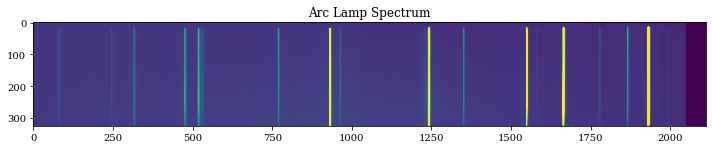

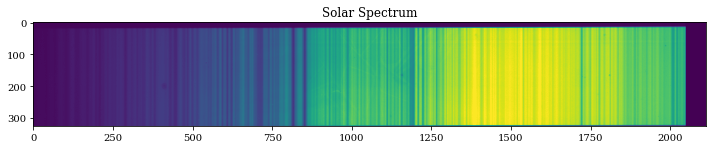

In [99]:
# visualize files
# spectrum of arc lamps that produce emission lines at known wavelengths
plot_image(arcs_data, 1, 99, title = "Arc Lamp Spectrum", c_label = "???")

# spectrum of the twilight sky (scattered sunlight)
plot_image(solar_data, 1, 99, title = "Solar Spectrum", c_label = "???")

# wavelength solution from arcs.fits can be applied to solar_spectrum.fits

In [100]:
# find the arclight spectrum that corresponds to the arc.fits
# https://mthamilton.ucolick.org/techdocs/instruments/kast/kast_arcSpectra.html
# LOL. It should be on the header. 
# by eye, I have identified which lamps are on in the fits header... eventually
# please automate this, RIP. 
#repr(arcs_hdr)

# verify if these are indeed on... 
print(arcs_hdr['LAMPSTAG']) # G 
print(arcs_hdr['LAMPSTAF']) # F
print(arcs_hdr['LAMPSTAD']) # D 
print(arcs_hdr['LAMPSTAJ']) # J 

on
on
on
on


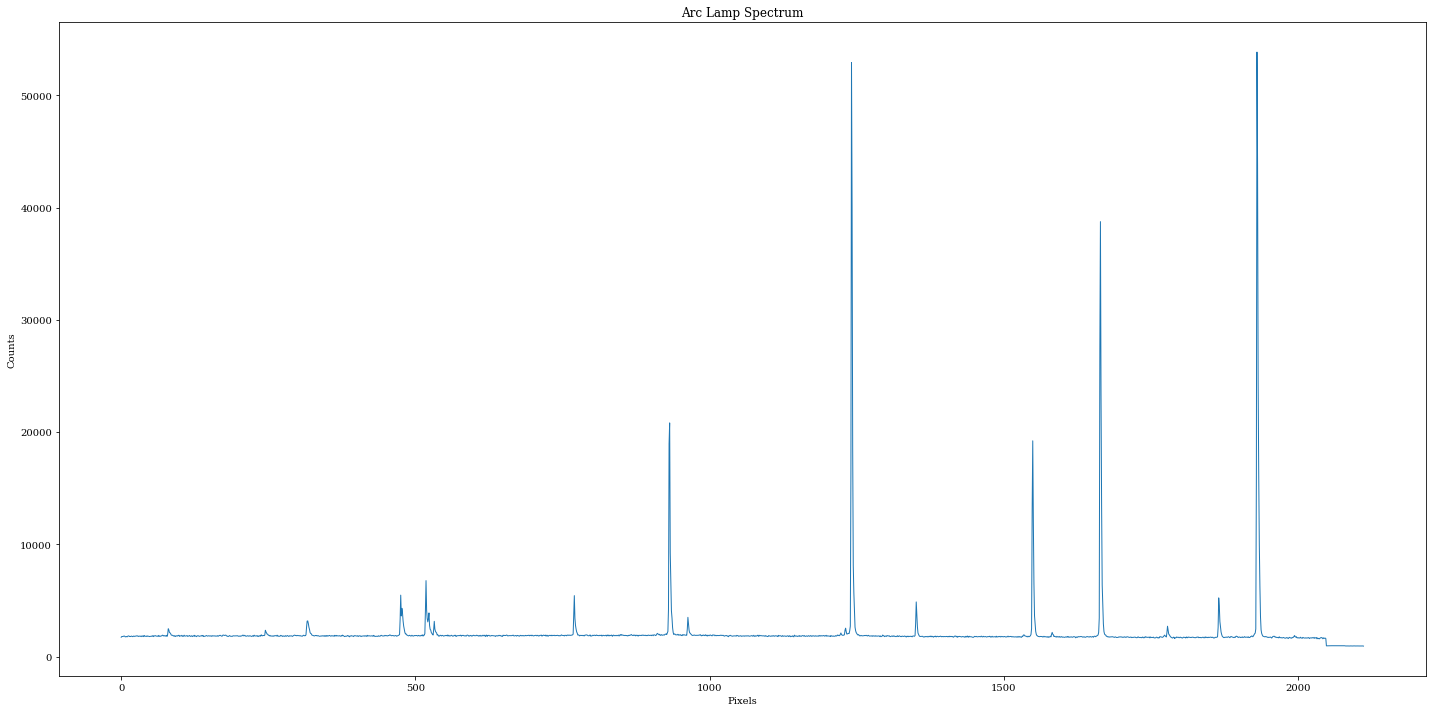

In [101]:
plot_spectra(arcs_data[150], 'Arc Lamp Spectrum', 'Pixels', 'Counts')

In [103]:
#how many lines per mm (how finely grooved)
#peak transmission number
#1921 + 25 = 1946 => He 5875.62
#1721 - 60 = 1661 =>  Hg 1 5460.74
# 936 => Hg I 4358.33 
# 968 => He 4471.50 
# 

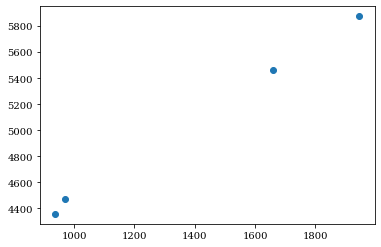

In [104]:
# pixel values
pixels = [1946, 1661, 936, 968]
wavelengths = [5875.62, 5460.74, 4358.33, 4471.50]

plt.scatter(pixels, wavelengths)

In [105]:
model_points = np.linspace(800, 2100, 100)
z = np.polyfit(pixels, wavelengths, 2)
p = np.poly1d(z)
print(z)

[-5.53930423e-05  1.62869625e+00  2.91336825e+03]


Text(0, 0.5, 'Wavelengths')

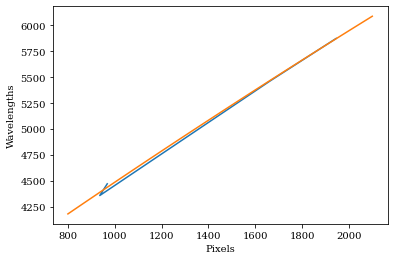

In [106]:
plt.plot(pixels, wavelengths, model_points, p(model_points))
plt.xlabel("Pixels")
plt.ylabel("Wavelengths")

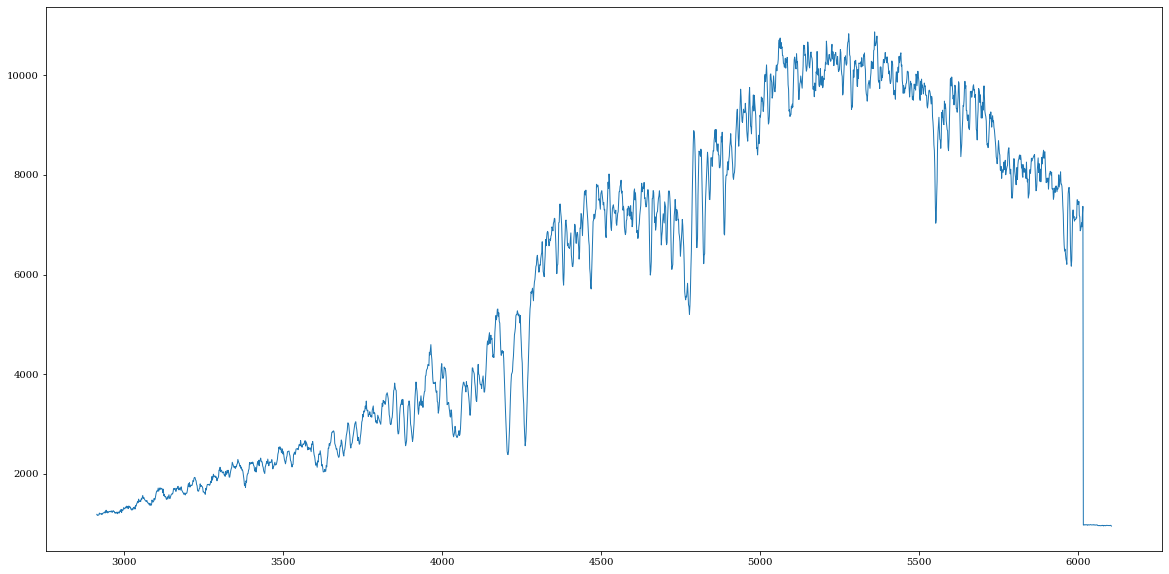

In [107]:
# spectrum of the twilight sky (scattered sunlight)
plt.figure(figsize = (20,10))
x_range = len(solar_data[0])
x_values = np.linspace(0, 2112, 2112)
plt.plot(p(x_values), solar_data[150], lw = 1)

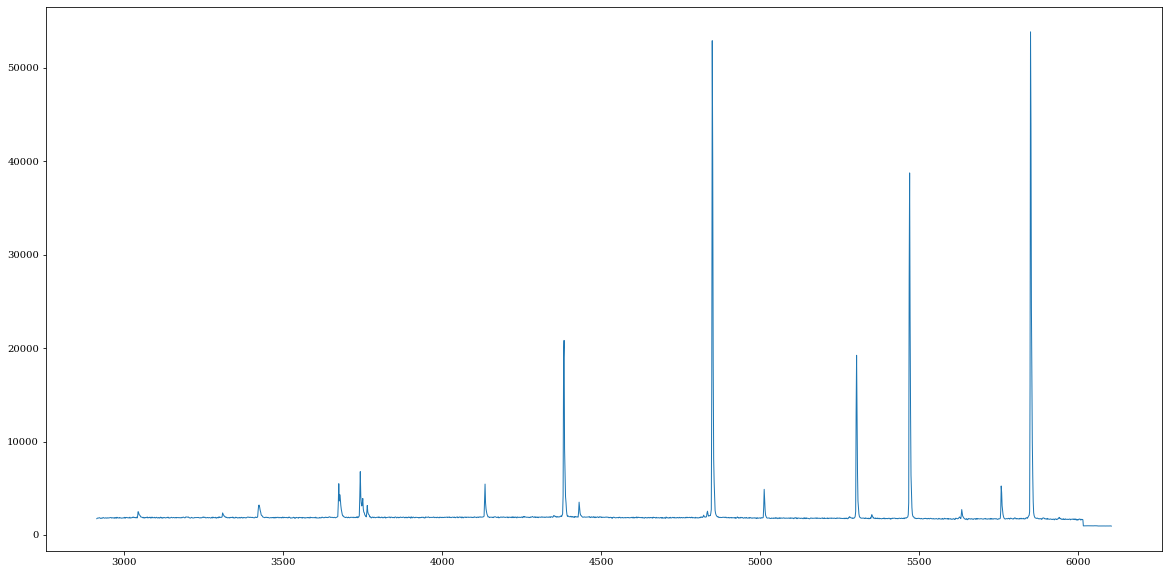

In [108]:
plt.figure(figsize = (20,10))

plt.plot(p(x_values), arcs_data[150], lw = 1)
low_x = p(x_values[0])
high_x = p(x_values[-1])